# Signal Reconstruction from Non-Uniform Frequency Sampling 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.fft import fft2, fftshift, ifft2, ifftshift

C:\Users\akank\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#   Load and Convert to Grayscale Function

In [2]:
import numpy as np
from skimage import io, color

def load_and_convert_to_grayscale(image_path):
    """
    Load an image from the specified path and convert it to grayscale if it's in color.
    
    Parameters:
    - image_path (str): The path to the image file.
    
    Returns:
    - img (numpy.ndarray): The grayscale image.
    """
    img = io.imread(image_path)
    if len(img.shape) == 3:
        img = color.rgb2gray(img)
    return img


## Calculate Magnitude Spectrum Function

In [3]:
import numpy as np
from scipy.fft import fft2, fftshift

def calculate_magnitude_spectrum(image):
    """
    Calculate the magnitude spectrum of an image.
    
    Parameters:
    - image (numpy.ndarray): The input image.
    
    Returns:
    - magnitude_spectrum (numpy.ndarray): The magnitude spectrum of the image.
    """
    f_img = fft2(image)
    fshift = fftshift(f_img)
    magnitude_spectrum = np.abs(fshift)
    return magnitude_spectrum


# Create Distance Matrix Function

In [4]:
import numpy as np

def create_distance_matrix(image):
    """
    Create a distance matrix for an image.
    
    Parameters:
    - image (numpy.ndarray): The input image.
    
    Returns:
    - D (numpy.ndarray): The distance matrix.
    """
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(cols) - ccol
    y = np.arange(rows) - crow
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    return D


# Radial Non-Uniform Sampling Function

In [5]:
import numpy as np
from scipy.fft import fft2, fftshift

def radial_non_uniform_sampling(image, percentage):
    """
    Perform radial non-uniform sampling on an image.
    
    Parameters:
    - image (numpy.ndarray): The input image.
    - percentage (float): The percentage of the frequency components to sample.
    
    Returns:
    - sampled_fshift (numpy.ndarray): The sampled frequency spectrum.
    """
    f_img = fft2(image)
    fshift = fftshift(f_img)
    D = create_distance_matrix(image)
    max_distance = np.max(D)
    threshold_distance = max_distance * (percentage / 100.0)
    mask = D <= threshold_distance
    sampled_fshift = mask * fshift
    return sampled_fshift


# Reconstruct Image using INUFT

In [6]:
import numpy as np
from scipy.fft import ifft2, ifftshift

def inverse_nonuniform_fourier_transform(sampled_fshift):
    """
    Reconstruct an image from the sampled frequency spectrum.
    
    Parameters:
    - sampled_fshift (numpy.ndarray): The sampled frequency spectrum.
    
    Returns:
    - reconstructed_img (numpy.ndarray): The reconstructed image.
    """
    ishift = ifftshift(sampled_fshift)
    reconstructed_img = ifft2(ishift).real
    return reconstructed_img


# Reconstruct Image using FDI

In [7]:
def frequency_domain_interpolation(sampled_fshift, factor=2):
    """
    Perform frequency domain interpolation (FDI) on the sampled frequency spectrum.
    
    Parameters:
    - sampled_fshift (numpy.ndarray): The sampled frequency spectrum.
    - factor (int): The interpolation factor.
    
    Returns:
    - interpolated_img (numpy.ndarray): The interpolated image.
    """
    # Get the shape of the sampled frequency domain
    sampled_rows, sampled_cols = sampled_fshift.shape

    # Get the center indices
    crow, ccol = sampled_rows // 2, sampled_cols // 2

    # Calculate the interpolated size
    interp_rows, interp_cols = factor * sampled_rows, factor * sampled_cols

    # Create an array for the interpolated frequency domain
    padded_fshift = np.zeros((interp_rows, interp_cols), dtype=sampled_fshift.dtype)

    # Zero-pad the sampled frequency spectrum
    padded_fshift[crow - sampled_rows//2:crow + (sampled_rows - sampled_rows//2),
                  ccol - sampled_cols//2:ccol + (sampled_cols - sampled_cols//2)] = sampled_fshift

    # Apply inverse FFT to get the interpolated image
    interpolated_img = np.abs(ifft2(ifftshift(padded_fshift)))

    return interpolated_img

# Visualize Results Function

In [8]:
import matplotlib.pyplot as plt

def visualize_results(original_image, sampled_fshift, reconstructed_image):
    """
    Visualize the original image, sampled frequency spectrum, and reconstructed image.
    
    Parameters:
    - original_image (numpy.ndarray): The original grayscale image.
    - sampled_fshift (numpy.ndarray): The sampled frequency spectrum.
    - reconstructed_image (numpy.ndarray): The reconstructed image.
    """
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title("Sampled Frequency Spectrum")
    plt.imshow(np.log1p(np.abs(sampled_fshift)), cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
    plt.show()


# Radial Non-Uniform Sampling and Inverse Fourier Transform Reconstruction Function

In [9]:
def radial_non_uniform_sampling_and_inuft_reconstruction(image_path, percentage=10):
    """
    Perform radial non-uniform sampling and reconstruction on an image.
    
    Parameters:
    - image_path (str): The path to the image file.
    - percentage (float): The percentage of the frequency components to sample.
    """
    img = load_and_convert_to_grayscale(image_path)
    sampled_fshift = radial_non_uniform_sampling(img, percentage)
    reconstructed_img = inverse_nonuniform_fourier_transform(sampled_fshift)
    visualize_results(img, sampled_fshift, reconstructed_img)


# Radial Non-Uniform Sampling and Frequency Domain Interpolation Reconstruction Function

In [10]:
def radial_non_uniform_sampling_and_fdi_reconstruction(image_path, percentage=10):
    """
    Perform radial non-uniform sampling and reconstruction using frequency domain interpolation (FDI).
    
    Parameters:
    - image_path (str): The path to the image file.
    - percentage (float): The percentage of the frequency components to sample.
    """
    # Load and convert the image to grayscale
    img = load_and_convert_to_grayscale(image_path)
    
    # Perform radial non-uniform sampling
    sampled_fshift = radial_non_uniform_sampling(img, percentage)
    
    # Reconstruct image using Frequency Domain Interpolation (FDI)
    reconstructed_img = frequency_domain_interpolation(sampled_fshift, factor=2)
    
    # Visualize the results
    visualize_results(img, sampled_fshift, reconstructed_img)


# Inverse Non-uniform Fourier Transform

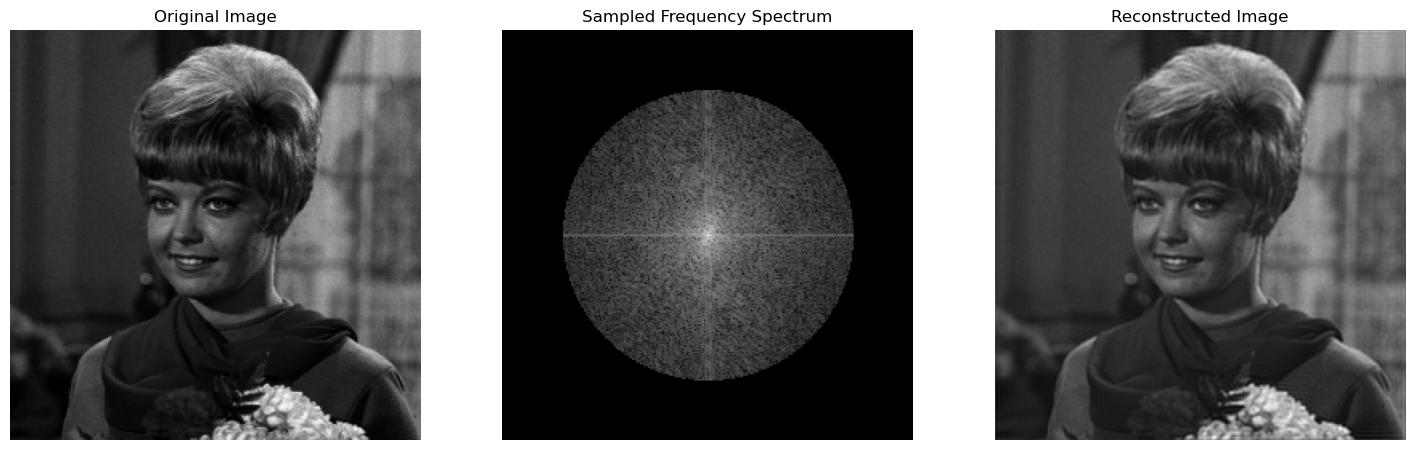

In [11]:


# Example usage
image_path = "4.1.01.tiff" # Specify the path to your image
radial_non_uniform_sampling_and_inuft_reconstruction(image_path, percentage=50)


# Frequency Domain Interpolation

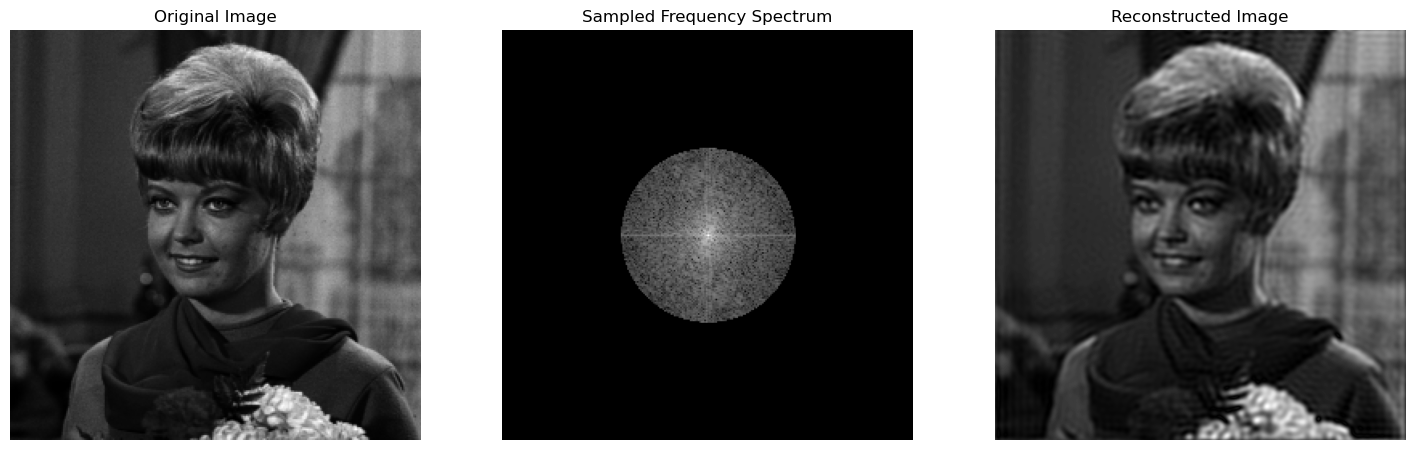

In [12]:
# Example usage
image_path = "4.1.01.tiff" # Specify the path to your image
radial_non_uniform_sampling_and_fdi_reconstruction(image_path, percentage=30)


# Plot Signal Function

In [13]:
def plot_signal(sampled_fshift):
    """
    Plot the signals extracted from the sampled frequency spectrum.
    
    Parameters:
    - sampled_fshift (numpy.ndarray): The sampled frequency spectrum.
    """
    # Extract a row and a column from the sampled frequency spectrum
    row = sampled_fshift[sampled_fshift.shape[0] // 2, :]
    col = sampled_fshift[:, sampled_fshift.shape[1] // 2]
    
    # Define the range for zooming in
    zoom_range = range(100, 151)
    
    # Plot the signals
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(row[zoom_range])), np.abs(row[zoom_range]))
    plt.title("Signal Plot: Row")
    plt.xlabel("Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(col[zoom_range])), np.abs(col[zoom_range]))
    plt.title("Signal Plot: Column")
    plt.xlabel("Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


# Signal Plots of Original,Sampled and Reconstructed Image using INUFT

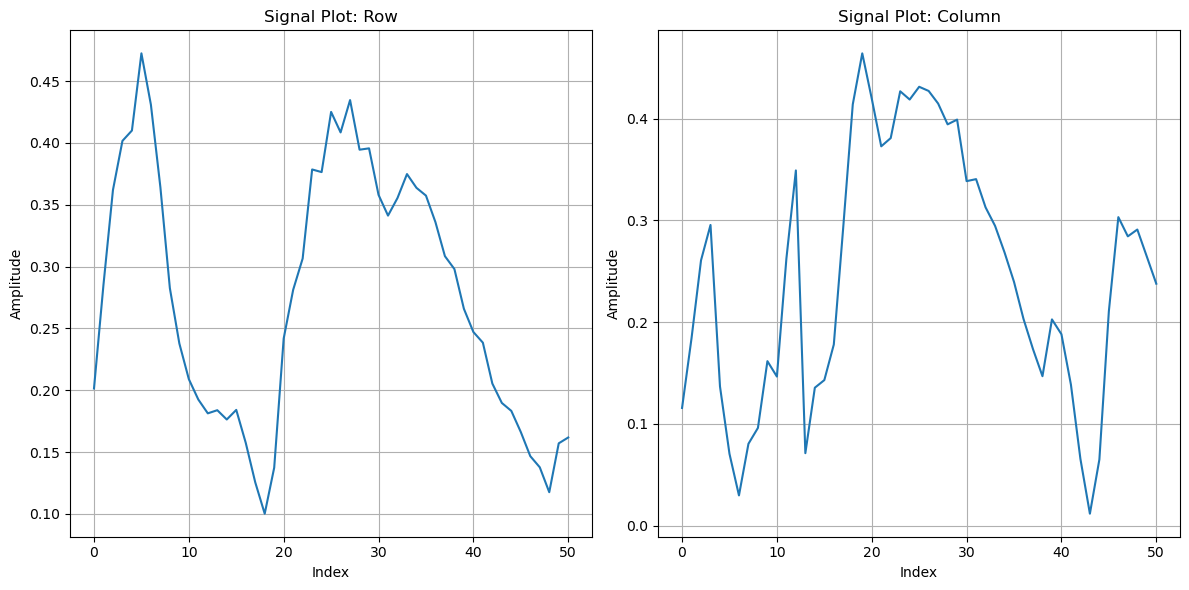

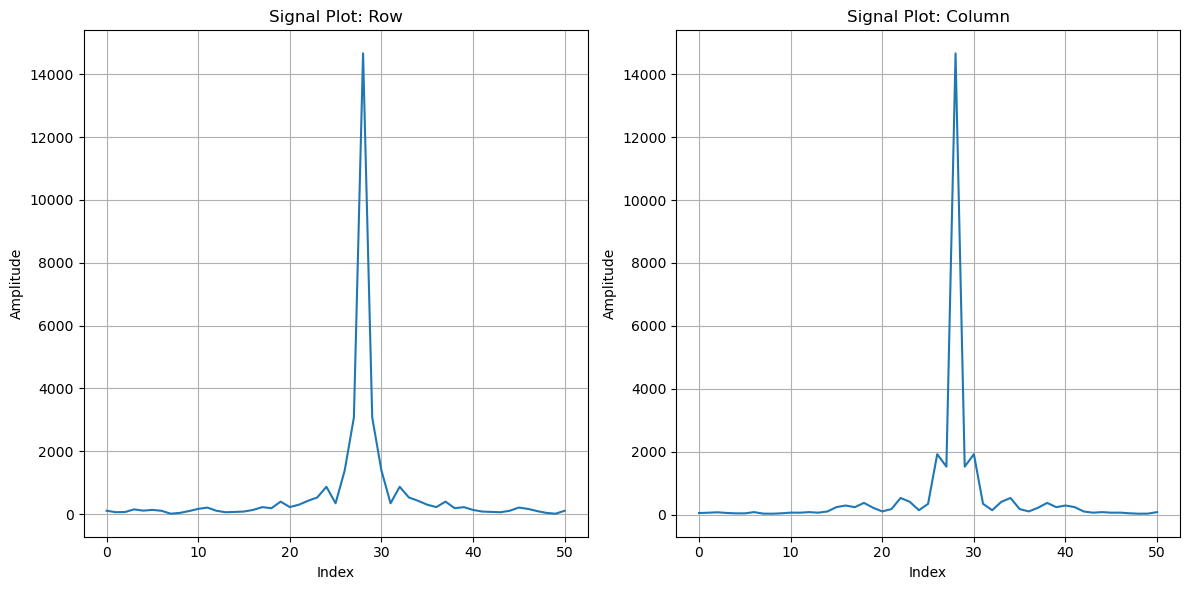

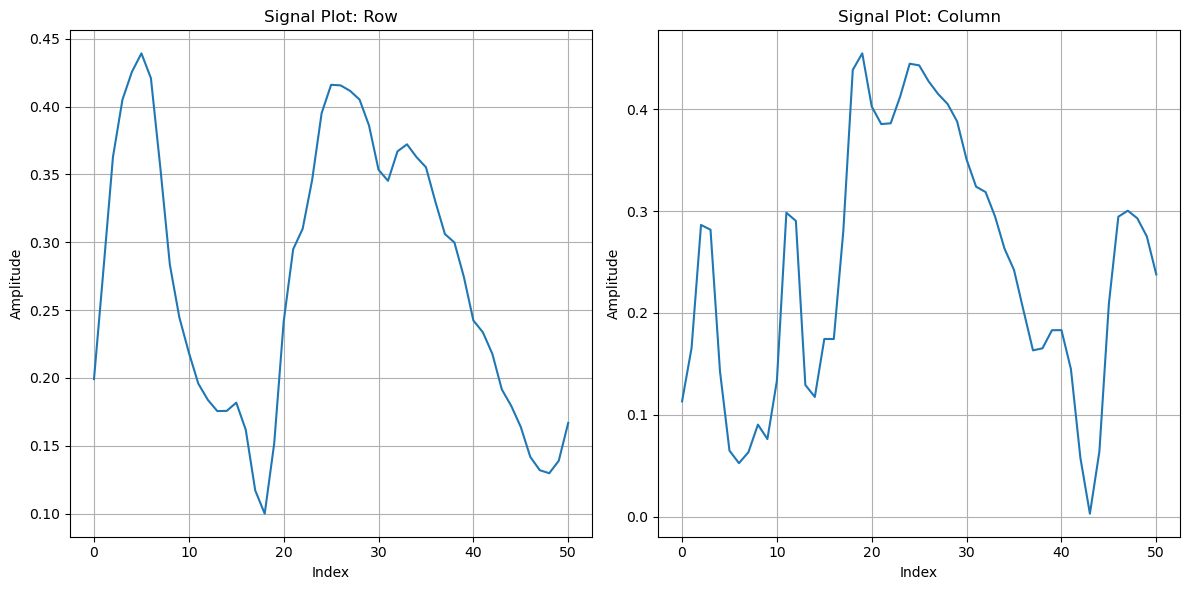

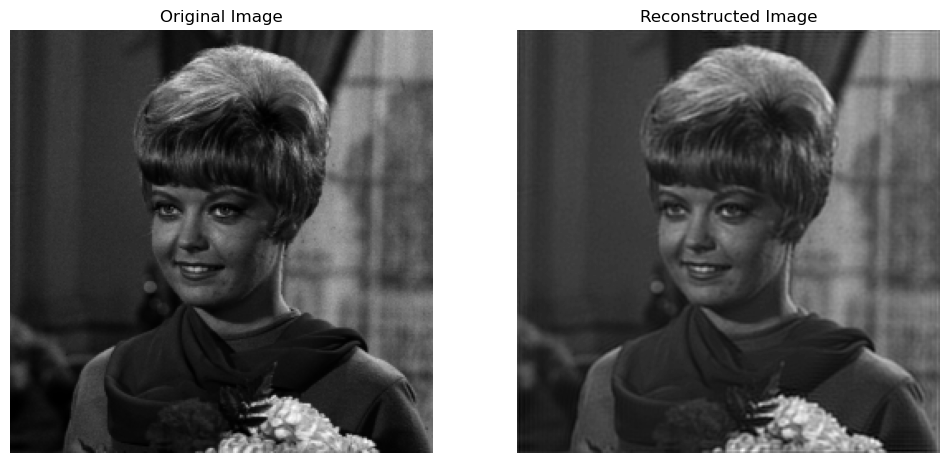

In [14]:
def radial_non_uniform_sampling_and_reconstruction(image_path, percentage=10):
    """
    Perform radial non-uniform sampling and INUFT reconstruction.
    
    Parameters:
    - image_path (str): The path to the image file.
    - percentage (float): The percentage of the frequency components to sample.
    """
    
    img = load_and_convert_to_grayscale(image_path)
    sampled_fshift = radial_non_uniform_sampling(img, percentage)
    reconstructed_img = inverse_nonuniform_fourier_transform(sampled_fshift)
    
    
   
    plot_signal(img)
    plot_signal(sampled_fshift)
    plot_signal(reconstructed_img)

    # Plot original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_img, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
radial_non_uniform_sampling_and_reconstruction(image_path, percentage=50)

# Signal Plots of Original,Sampled and Reconstructed Image using FDI

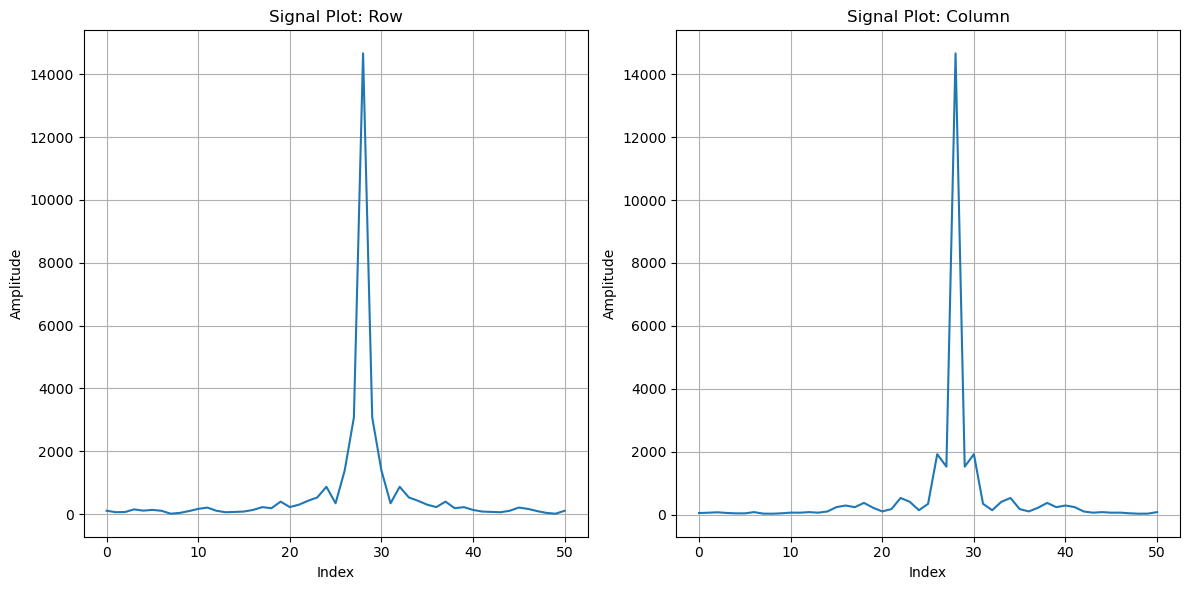

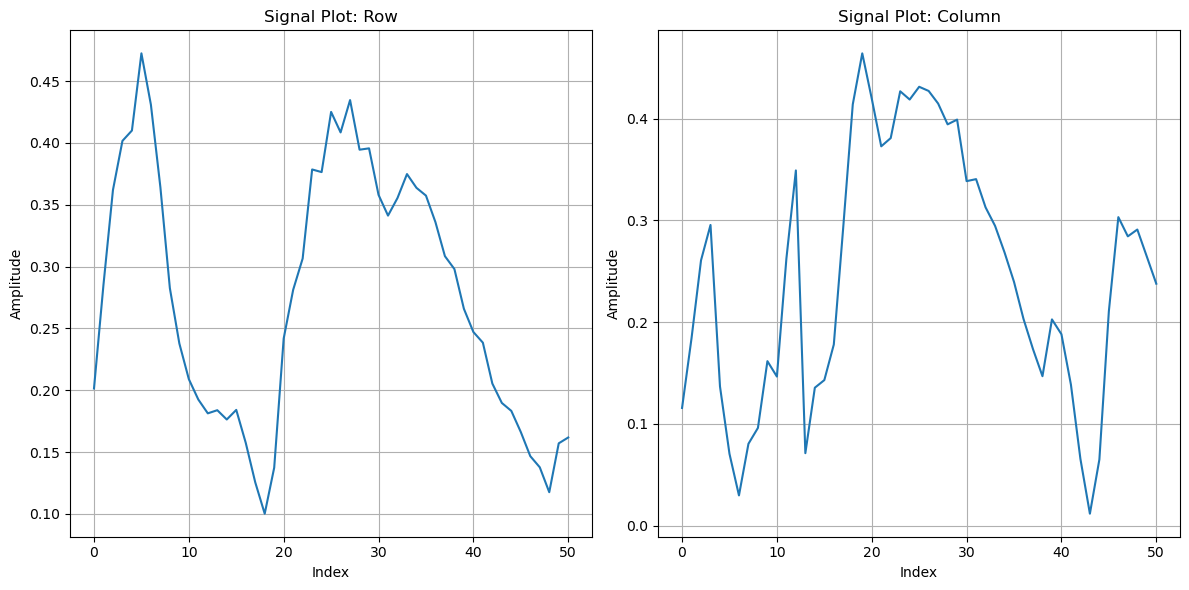

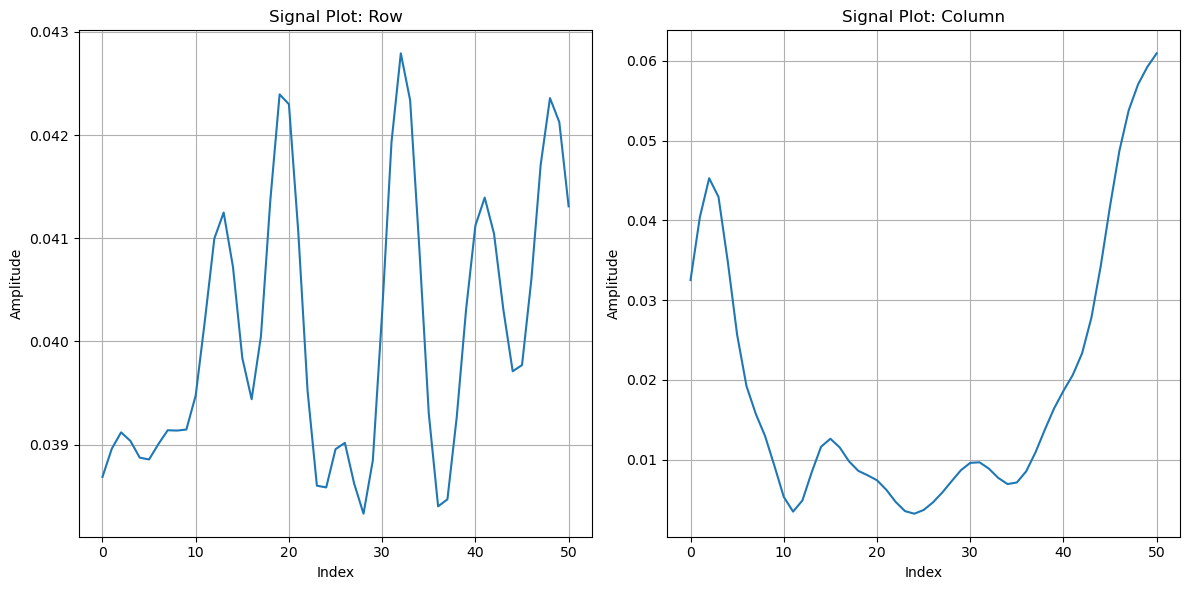

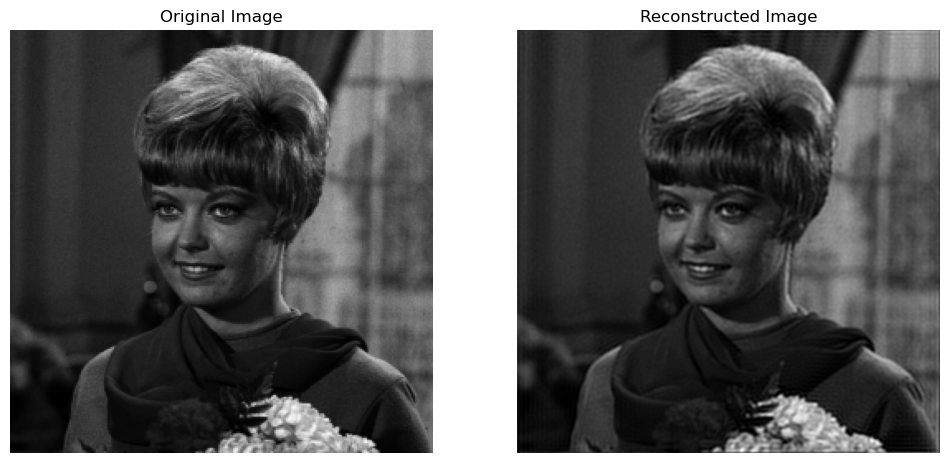

In [15]:
def radial_non_uniform_sampling_and_reconstruction(image_path, percentage=10):
    """
    Perform radial non-uniform sampling and FDI reconstruction.
    
    Parameters:
    - image_path (str): The path to the image file.
    - percentage (float): The percentage of the frequency components to sample.
    """
    
    img = load_and_convert_to_grayscale(image_path)
    sampled_fshift = radial_non_uniform_sampling(img, percentage)
    reconstructed_img = frequency_domain_interpolation(sampled_fshift)
    
    
    # Plot signal after sampling
    plot_signal(sampled_fshift)
    plot_signal(img)
    plot_signal(reconstructed_img)

    # Plot original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_img, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
radial_non_uniform_sampling_and_reconstruction(image_path, percentage=50)

# Plot Phase Spectrum for Original, Sampled, and Reconstructed Image using INUFT

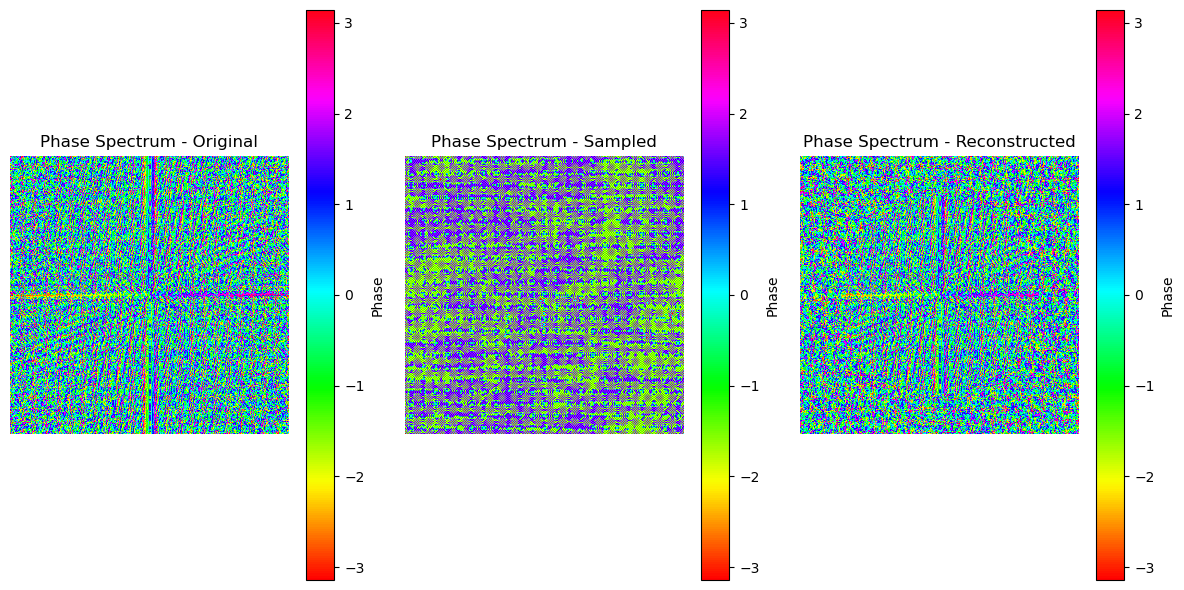

In [16]:
def plot_phase_spectrum(original_image, sampled_image, reconstructed_image):
    # Compute the Fourier transform
    f_original = fft2(original_image)
    f_sampled = fft2(sampled_image)
    f_reconstructed = fft2(reconstructed_image)
    
    # Compute phase spectrum
    phase_original = np.angle(fftshift(f_original))
    phase_sampled = np.angle(fftshift(f_sampled))
    phase_reconstructed = np.angle(fftshift(f_reconstructed))
    
    # Plot phase spectrum
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(phase_original, cmap='hsv')
    plt.title("Phase Spectrum - Original")
    plt.colorbar(label='Phase')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(phase_sampled, cmap='hsv')
    plt.title("Phase Spectrum - Sampled")
    plt.colorbar(label='Phase')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(phase_reconstructed, cmap='hsv')
    plt.title("Phase Spectrum - Reconstructed")
    plt.colorbar(label='Phase')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
original_img = load_and_convert_to_grayscale(image_path)
sampled_img = radial_non_uniform_sampling(original_img, percentage=50)
reconstructed_img = inverse_nonuniform_fourier_transform(sampled_img)

plot_phase_spectrum(original_img, sampled_img, reconstructed_img)


# Plot Phase Spectrum for Original, Sampled, and Reconstructed Image using FDI

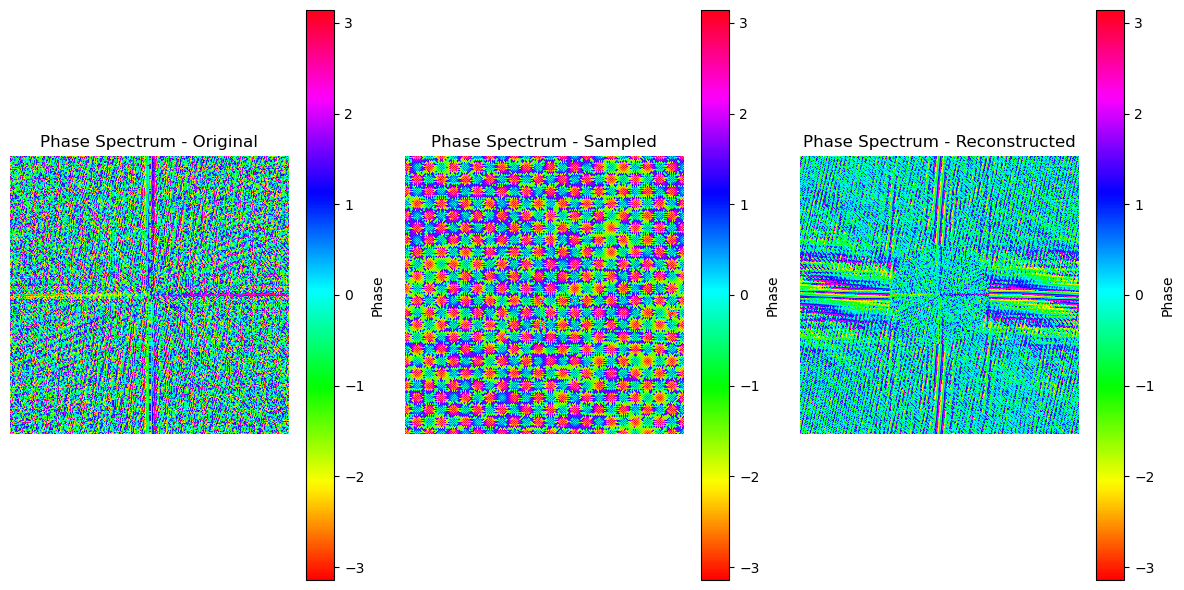

In [17]:
def plot_phase_spectrum(original_image, sampled_image, reconstructed_image):
    # Compute the Fourier transform
    f_original = fft2(original_image)
    f_sampled = fft2(sampled_image)
    f_reconstructed = fft2(reconstructed_image)
    
    # Compute phase spectrum
    phase_original = np.angle(fftshift(f_original))
    phase_sampled = np.angle(fftshift(f_sampled))
    phase_reconstructed = np.angle(fftshift(f_reconstructed))
    
    # Plot phase spectrum
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(phase_original, cmap='hsv')
    plt.title("Phase Spectrum - Original")
    plt.colorbar(label='Phase')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(phase_sampled, cmap='hsv')
    plt.title("Phase Spectrum - Sampled")
    plt.colorbar(label='Phase')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(phase_reconstructed, cmap='hsv')
    plt.title("Phase Spectrum - Reconstructed")
    plt.colorbar(label='Phase')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
original_img = load_and_convert_to_grayscale(image_path)
sampled_img = radial_non_uniform_sampling(original_img, percentage=50)
reconstructed_img = frequency_domain_interpolation(sampled_img)

plot_phase_spectrum(original_img, sampled_img, reconstructed_img)


# Plot Frequency Spectrum for Original, Sampled, and Reconstructed Images using INUFT

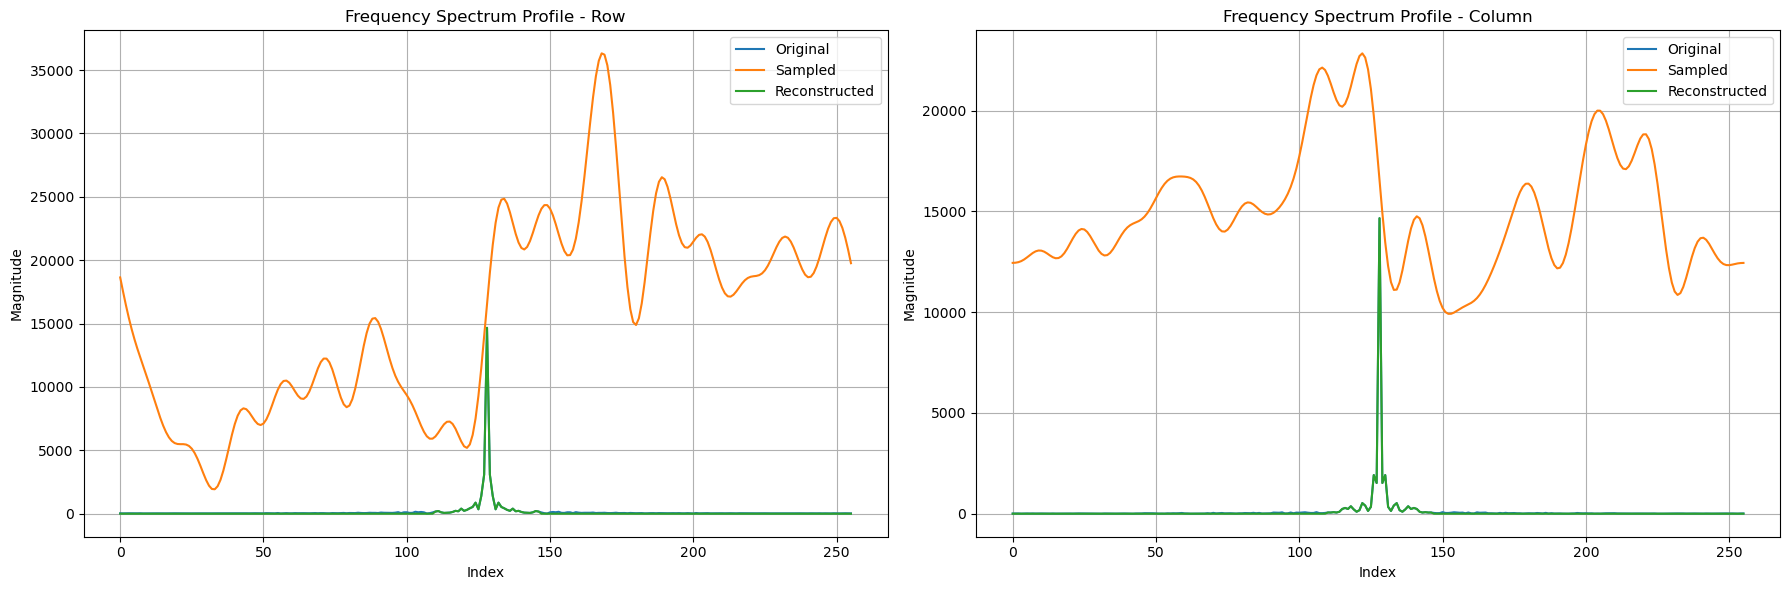

In [18]:
def plot_frequency_spectrum_profiles(original_image, sampled_image, reconstructed_image ):
    # Compute the Fourier transform
    f_original = fft2(original_image)
    f_sampled = fft2(sampled_image)
    
    f_reconstructed = fft2(reconstructed_image)
    
    # Extract a row and a column from the frequency spectrum
    row_original = np.abs(fftshift(f_original))[f_original.shape[0] // 2, :]
    row_sampled = np.abs(fftshift(f_sampled))[f_sampled.shape[0] // 2, :]
    
    row_reconstructed = np.abs(fftshift(f_reconstructed))[f_reconstructed.shape[0] // 2, :]
    
    col_original = np.abs(fftshift(f_original))[:, f_original.shape[1] // 2]
    col_sampled = np.abs(fftshift(f_sampled))[:, f_sampled.shape[1] // 2]
    
    col_reconstructed = np.abs(fftshift(f_reconstructed))[:, f_reconstructed.shape[1] // 2]
    
    # Plot the frequency spectrum profiles
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(row_original, label='Original')
    plt.plot(row_sampled, label='Sampled')
    plt.plot(row_reconstructed, label='Reconstructed')
    plt.title("Frequency Spectrum Profile - Row")
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(col_original, label='Original')
    plt.plot(col_sampled, label='Sampled')
    plt.plot(col_reconstructed, label='Reconstructed')
    plt.title("Frequency Spectrum Profile - Column")
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
original_img = load_and_convert_to_grayscale(image_path)
sampled_img = radial_non_uniform_sampling(original_img, percentage=10)
reconstructed_img = inverse_nonuniform_fourier_transform(sampled_img)

plot_frequency_spectrum_profiles(original_img, sampled_img, reconstructed_img)


# Plot Frequency Spectrum for Original, Sampled, and Reconstructed Images using FDI

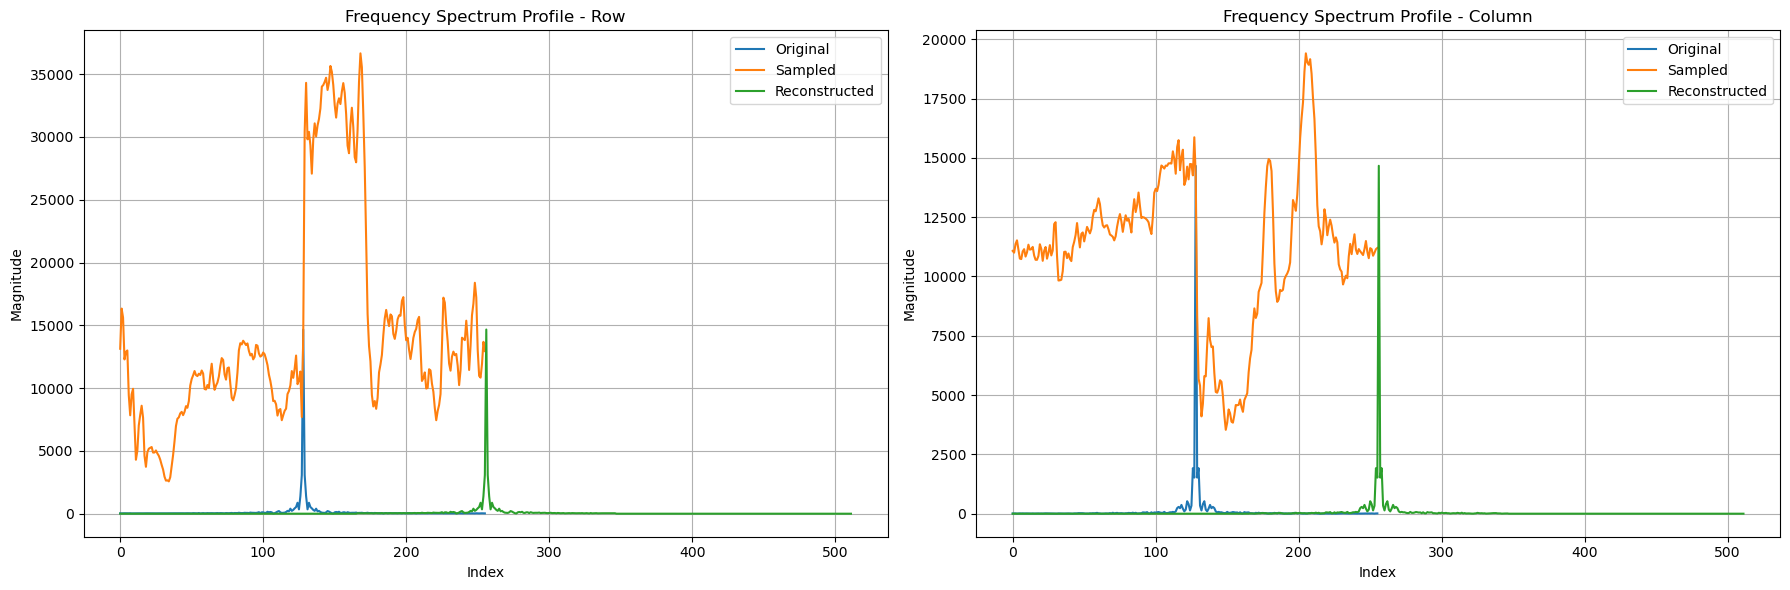

In [19]:
def plot_frequency_spectrum_profiles(original_image, sampled_image, reconstructed_image ):
    # Compute the Fourier transform
    f_original = fft2(original_image)
    f_sampled = fft2(sampled_image)
    
    f_reconstructed = fft2(reconstructed_image)
    
    # Extract a row and a column from the frequency spectrum
    row_original = np.abs(fftshift(f_original))[f_original.shape[0] // 2, :]
    row_sampled = np.abs(fftshift(f_sampled))[f_sampled.shape[0] // 2, :]
    
    row_reconstructed = np.abs(fftshift(f_reconstructed))[f_reconstructed.shape[0] // 2, :]
    
    col_original = np.abs(fftshift(f_original))[:, f_original.shape[1] // 2]
    col_sampled = np.abs(fftshift(f_sampled))[:, f_sampled.shape[1] // 2]
    
    col_reconstructed = np.abs(fftshift(f_reconstructed))[:, f_reconstructed.shape[1] // 2]
    
    # Plot the frequency spectrum profiles
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(row_original, label='Original')
    plt.plot(row_sampled, label='Sampled')
    plt.plot(row_reconstructed, label='Reconstructed')
    plt.title("Frequency Spectrum Profile - Row")
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(col_original, label='Original')
    plt.plot(col_sampled, label='Sampled')
    plt.plot(col_reconstructed, label='Reconstructed')
    plt.title("Frequency Spectrum Profile - Column")
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
original_img = load_and_convert_to_grayscale(image_path)
sampled_img = radial_non_uniform_sampling(original_img, percentage=50)
reconstructed_img = frequency_domain_interpolation(sampled_img)

plot_frequency_spectrum_profiles(original_img, sampled_img, reconstructed_img)


# Calculate Metrics for Image Reconstruction

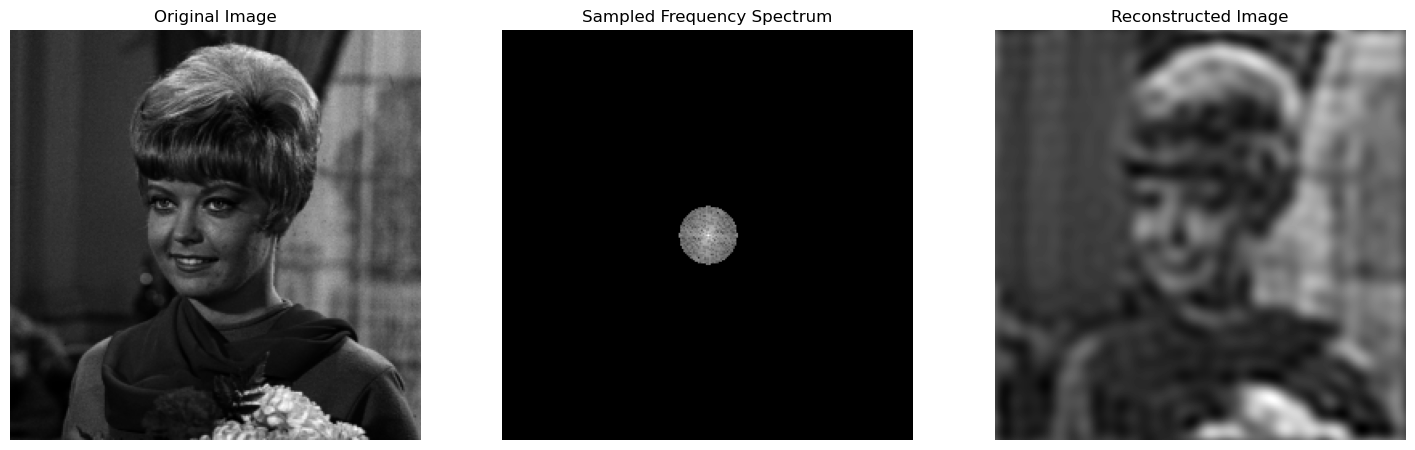

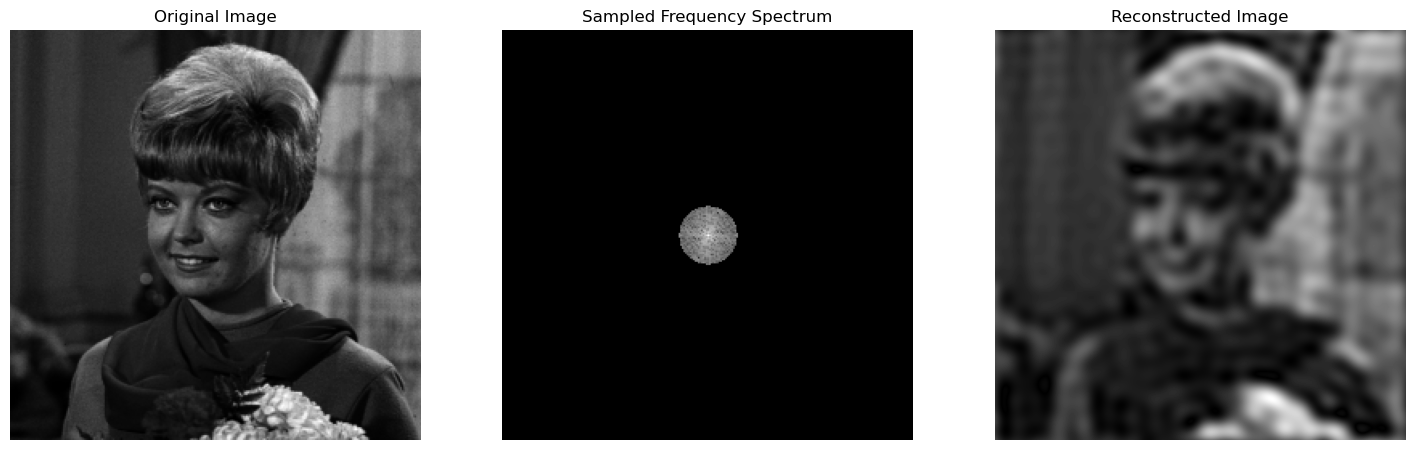

SSIM for NUFT: 0.6848249579214031
PSNR for NUFT: 25.748742128802398
SSIM for FDI: 0.2859407294823723
PSNR for FDI: 13.624067012521312


In [20]:
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_metrics(original_img, reconstructed_img):
    reconstructed_img_resized = resize(reconstructed_img, original_img.shape)
    ssim_score = ssim(original_img, reconstructed_img_resized, data_range=original_img.max() - original_img.min())
    psnr_score = psnr(original_img, reconstructed_img_resized)
    return ssim_score, psnr_score


def radial_non_uniform_sampling_and_reconstructionFinal(image_path, percentage=10):
    img = load_and_convert_to_grayscale(image_path)
    sampled_fshift = radial_non_uniform_sampling(img, percentage)
    reconstructed_img_nuft = inverse_nonuniform_fourier_transform(sampled_fshift)
    reconstructed_img_fdi = frequency_domain_interpolation(sampled_fshift)
    
    visualize_results(img, sampled_fshift, reconstructed_img_nuft)
    visualize_results(img, sampled_fshift, reconstructed_img_fdi)
    
    # Calculate metrics for NUFT
    ssim_nuft, psnr_nuft = calculate_metrics(img, reconstructed_img_nuft)
    print("SSIM for NUFT:", ssim_nuft)
    print("PSNR for NUFT:", psnr_nuft)
    
    # Calculate metrics for FDI
    ssim_fdi, psnr_fdi = calculate_metrics(img, reconstructed_img_fdi)
    print("SSIM for FDI:", ssim_fdi)
    print("PSNR for FDI:", psnr_fdi)

# Example usage
image_path = "4.1.01.tiff" # Specify the path to your image
radial_non_uniform_sampling_and_reconstructionFinal(image_path, percentage=10)


In [21]:
def radial_non_uniform_sampling_and_reconstruction_final(image_path):
    img = load_and_convert_to_grayscale(image_path)
    
    for percentage in range(10, 101, 10):  # Range from 10 to 100 with step 10
        sampled_fshift = radial_non_uniform_sampling(img, percentage)
        reconstructed_img_nuft = inverse_nonuniform_fourier_transform(sampled_fshift)
        reconstructed_img_fdi = frequency_domain_interpolation(sampled_fshift)
        
        # Calculate metrics for NUFT
        ssim_nuft, psnr_nuft = calculate_metrics(img, reconstructed_img_nuft)
        
        # Calculate metrics for FDI
        ssim_fdi, psnr_fdi = calculate_metrics(img, reconstructed_img_fdi)
        
        print(f"Percentage: {percentage}")
        print("SSIM for NUFT:", ssim_nuft)
        print("PSNR for NUFT:", psnr_nuft)
        print("SSIM for FDI:", ssim_fdi)
        print("PSNR for FDI:", psnr_fdi)
        print("====================================")

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
radial_non_uniform_sampling_and_reconstruction_final(image_path)


Percentage: 10
SSIM for NUFT: 0.6848249579214031
PSNR for NUFT: 25.748742128802398
SSIM for FDI: 0.2859407294823723
PSNR for FDI: 13.624067012521312
Percentage: 20
SSIM for NUFT: 0.8382001573558616
PSNR for NUFT: 29.111567940207227
SSIM for FDI: 0.3157033154199838
PSNR for FDI: 13.685335968727667
Percentage: 30
SSIM for NUFT: 0.9089836266764441
PSNR for NUFT: 31.95299660970475
SSIM for FDI: 0.32733217697758943
PSNR for FDI: 13.709194965943766
Percentage: 40
SSIM for NUFT: 0.9427745268438942
PSNR for NUFT: 34.391719177238585
SSIM for FDI: 0.333430467288673
PSNR for FDI: 13.719318361018146
Percentage: 50
SSIM for NUFT: 0.9635489421018784
PSNR for NUFT: 36.83515919674348
SSIM for FDI: 0.33690418196584987
PSNR for FDI: 13.724457084925334
Percentage: 60
SSIM for NUFT: 0.97696072583529
PSNR for NUFT: 39.724103355756746
SSIM for FDI: 0.33892548970542336
PSNR for FDI: 13.727306223114832
Percentage: 70
SSIM for NUFT: 0.9908184880267714
PSNR for NUFT: 44.859142065972776
SSIM for FDI: 0.340292642

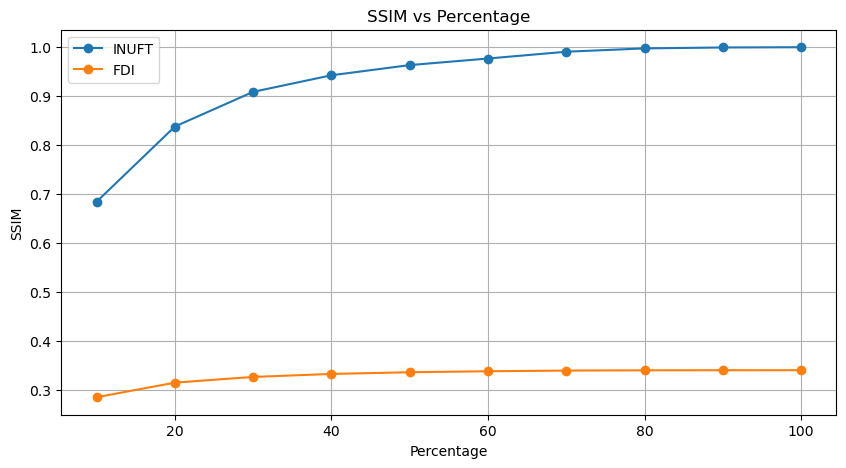

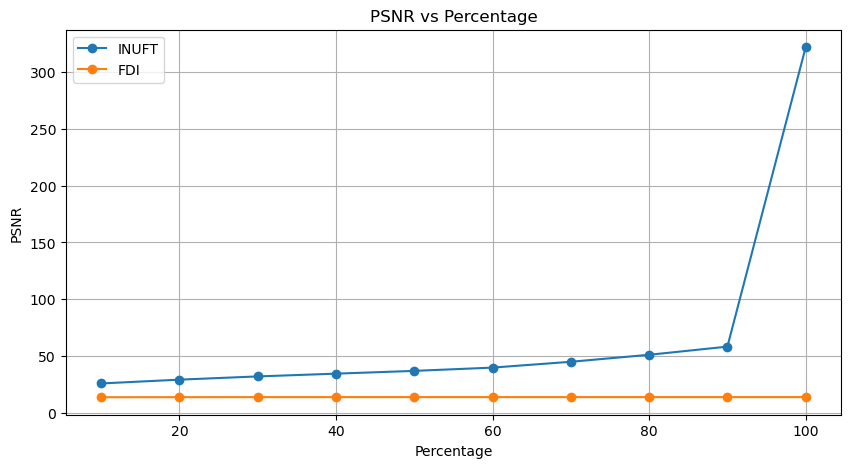

In [22]:
import matplotlib.pyplot as plt

def collect_metrics(image_path):
    ssim_nuft_values = []
    psnr_nuft_values = []
    ssim_fdi_values = []
    psnr_fdi_values = []
    
    img = load_and_convert_to_grayscale(image_path)
    
    for percentage in range(10, 101, 10):  # Range from 10 to 100 with step 10
        sampled_fshift = radial_non_uniform_sampling(img, percentage)
        reconstructed_img_nuft = inverse_nonuniform_fourier_transform(sampled_fshift)
        reconstructed_img_fdi = frequency_domain_interpolation(sampled_fshift)
        
        # Calculate metrics for NUFT
        ssim_nuft, psnr_nuft = calculate_metrics(img, reconstructed_img_nuft)
        ssim_nuft_values.append(ssim_nuft)
        psnr_nuft_values.append(psnr_nuft)
        
        # Calculate metrics for FDI
        ssim_fdi, psnr_fdi = calculate_metrics(img, reconstructed_img_fdi)
        ssim_fdi_values.append(ssim_fdi)
        psnr_fdi_values.append(psnr_fdi)
    
    return ssim_nuft_values, psnr_nuft_values, ssim_fdi_values, psnr_fdi_values

def plot_metrics(image_path):
    ssim_nuft_values, psnr_nuft_values, ssim_fdi_values, psnr_fdi_values = collect_metrics(image_path)
    
    percentages = range(10, 101, 10)
    
    # Plot SSIM values
    plt.figure(figsize=(10, 5))
    plt.plot(percentages, ssim_nuft_values, marker='o', label='INUFT')
    plt.plot(percentages, ssim_fdi_values, marker='o', label='FDI')
    plt.xlabel('Percentage')
    plt.ylabel('SSIM')
    plt.title('SSIM vs Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot PSNR values
    plt.figure(figsize=(10, 5))
    plt.plot(percentages, psnr_nuft_values, marker='o', label='INUFT')
    plt.plot(percentages, psnr_fdi_values, marker='o', label='FDI')
    plt.xlabel('Percentage')
    plt.ylabel('PSNR')
    plt.title('PSNR vs Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
image_path = "4.1.01.tiff"  # Specify the path to your image
plot_metrics(image_path)
